# Bayesian biodiversity: PREDICTS data exploration

### TODO
- Filtering of data
- Color palettes
- Number formatting below 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import geopandas as geopd
import polars as pl

# from shapely.geometry import Point
from matplotlib.ticker import FuncFormatter, MaxNLocator
import time
import scipy

In [2]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

# Adjust display settings for pandas
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [ ]:
sns.set_style("ticks")
plt.rc("figure", titlesize="medium")
plt.rc("font", size=10, family="serif")
plt.rc("axes", titlesize="medium")
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}\usepackage{amssymb}")

In [3]:
# Load the complete data set
# The first sections use pandas functions, so we load it as a pd dataframe
df_predicts = pd.read_csv("../../data/PREDICTS/merged_data.csv")

/var/folders/pd/qpp_vpcn3wv209_68c5q1_r80000gn/T/ipykernel_57365/4292107368.py:3: DtypeWarning: Columns (5,7,23,24,36,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predicts = pd.read_csv("../../data/PREDICTS/merged_data.csv")


In [6]:
df_predicts.shape

(4318808, 68)

In [7]:
df_predicts.head()

,_id,Source_ID,Reference,Study_number,Study_name,Block,Site_number,Site_name,SS,SSS,SSB,SSBS,Longitude,Latitude,Coordinates_method,Country,Country_distance_metres,UN_region,UN_subregion,Realm,Biome,Ecoregion,Ecoregion_distance_metres,Wilderness_area,Hotspot,Study_common_taxon,Rank_of_study_common_taxon,Sample_start_earliest,Sample_end_latest,Sample_midpoint,Sample_date_resolution,Sampling_method,Sampling_effort,Rescaled_sampling_effort,Sampling_effort_unit,Max_linear_extent_metres,Transect_details,Taxon,Taxon_number,Taxon_name_entered,Parsed_name,Best_guess_binomial,COL_ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Higher_taxon,Indication,Name_status,Rank,Diversity_metric_type,Diversity_metric,Diversity_metric_is_effort_sensitive,Diversity_metric_is_suitable_for_Chao,Diversity_metric_unit,Measurement,Effort_corrected_measurement,Predominant_land_use,Source_for_predominant_land_use,Use_intensity,Habitat_as_described,Habitat_patch_area_square_metres,Km_to_nearest_edge_of_habitat,Years_since_fragmentation_or_conversion
0,26004,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F2,32,F2.P,AD1_2008__Billeter 8,AD1_2008__Billeter 8 32,AD1_2008__Billeter 8 F2,AD1_2008__Billeter 8 F2 32,-1.590365,48.472153,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Lasioglossum morio,49,Lasioglossum morio,Lasioglossum morio,Lasioglossum morio,6967008.0,Animalia,Arthropoda,Insecta,Hymenoptera,Halictidae,Lasioglossum,morio,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Minimal use,NaN,NaN,NaN,13.5
1,26006,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F2,32,F2.P,AD1_2008__Billeter 8,AD1_2008__Billeter 8 32,AD1_2008__Billeter 8 F2,AD1_2008__Billeter 8 F2 32,-1.590365,48.472153,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Lasioglossum pauxillum,51,Lasioglossum pauxillum,Lasioglossum pauxillum,Lasioglossum pauxillum,6967187.0,Animalia,Arthropoda,Insecta,Hymenoptera,Halictidae,Lasioglossum,pauxillum,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Minimal use,NaN,NaN,NaN,13.5
2,26024,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F3,33,F3.A,AD1_2008__Billeter 8,AD1_2008__Billeter 8 33,AD1_2008__Billeter 8 F3,AD1_2008__Billeter 8 F3 33,-1.610663,48.540593,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a Green-veins habitat and an a...,Andrena helvola,11,Andrena helvola,Andrena helvola,Andrena helvola,6960605.0,Animalia,Arthropoda,Insecta,Hymenoptera,Andrenidae,Andrena,helvola,Hymenoptera,Hymenoptera: Apidae sensu lato,accepted name,Species,Abundance,abundance,True,True,individuals,0.0,0.0,Cropland,Direct from publication / author,Light use,NaN,NaN,NaN,63.5
3,26031,AD1_2008__Billeter,Billeter et al. 2008,8,Greenveins2001_France02,F3,33,F3.A,AD1_2008__Billeter 8,AD1_2008__Billeter 8 33,AD1_2008__Billeter 8 F3,AD1_2008__Billeter 8 F3 33,-1.610663,48.540593,Direct from publication / author,France,0.0,Europe,Western Europe,Palearctic,Temperate Broadleaf & Mixed Forests,Atlantic Mixed Forests,0.0,NaN,NaN,Hymenoptera,Order,2002-01-01,2002-12-31,2002-07-02,year,flight trap,5.0,1.0,week,1414.214,Ecotone between a G

In [8]:
df_block_na = df_predicts[df_predicts["Block"].isna()]

In [9]:
df_block_na.head(10)

,_id,Source_ID,Reference,Study_number,Study_name,Block,Site_number,Site_name,SS,SSS,SSB,SSBS,Longitude,Latitude,Coordinates_method,Country,Country_distance_metres,UN_region,UN_subregion,Realm,Biome,Ecoregion,Ecoregion_distance_metres,Wilderness_area,Hotspot,Study_common_taxon,Rank_of_study_common_taxon,Sample_start_earliest,Sample_end_latest,Sample_midpoint,Sample_date_resolution,Sampling_method,Sampling_effort,Rescaled_sampling_effort,Sampling_effort_unit,Max_linear_extent_metres,Transect_details,Taxon,Taxon_number,Taxon_name_entered,Parsed_name,Best_guess_binomial,COL_ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Higher_taxon,Indication,Name_status,Rank,Diversity_metric_type,Diversity_metric,Diversity_metric_is_effort_sensitive,Diversity_metric_is_suitable_for_Chao,Diversity_metric_unit,Measurement,Effort_corrected_measurement,Predominant_land_use,Source_for_predominant_land_use,Use_intensity,Habitat_as_described,Habitat_patch_area_square_metres,Km_to_nearest_edge_of_habitat,Years_since_fragmentation_or_conversion
18616,2,AD1_2001__Liow,Liow et al. 2001,1,Singapore_abundance,NaN,2,MC,AD1_2001__Liow 1,AD1_2001__Liow 1 2,AD1_2001__Liow 1,AD1_2001__Liow 1 2,103.808056,1.354722,Georeferenced,Singapore,0.0,Asia,South-Eastern Asia,Indo-Malay,Tropical & Subtropical Moist Broadleaf Forests,Peninsular Malaysian Rain Forests,0.0,NaN,Sundaland,Apidae,Family,1999-02-24,1999-06-24,1999-04-25,day,transects with baits,30.0,1.0,trap,3000.0,NaN,Apidae,1,Bees,Bees,NaN,13025340.0,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,NaN,NaN,Hymenoptera,Hymenoptera: Apidae,accepted name,Family,Abundance,abundance,True,True,individuals,242.0,242.0,Mature secondary vegetation,Direct from publication / author,Cannot decide,"Secondary forest with primary patches, surroun...",5210000.0,NaN,70.0
18617,3,AD1_2001__Liow,Liow et al. 2001,1,Singapore_abundance,NaN,3,NS,AD1_2001__Liow 1,AD1_2001__Liow 1 3,AD1_2001__Liow 1,AD1_2001__Liow 1 3,103.811667,1.394722,Georeferenced,Singapore,0.0,Asia,South-Eastern Asia,Indo-Malay,Tropical & Subtropical Moist Broadleaf Forests,Peninsular Malaysian Rain Forests,0.0,NaN,Sundaland,Apidae,Family,1999-03-16,1999-07-08,1999-05-12,day,transects with baits,30.0,1.0,trap,3000.0,NaN,Apidae,1,Bees,Bees,NaN,13025340.0,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,NaN,NaN,Hymenoptera,Hymenoptera: Apidae,accepted name,Family,Abundance,abundance,True,True,individuals,232.0,232.0,Mature secondary vegetation,Direct from publication / author,Cannot decide,"Secondary forest with primary patches, surroun...",7946000.0,NaN,70.0
18618,7,AD1_2001__Liow,Liow et al. 2001,2,Singapore_speciesrichness,NaN,2,MC,AD1_2001__Liow 2,AD1_2001__Liow 2 2,AD1_2001__Liow 2,AD1_2001__Liow 2 2,103.808056,1.354722,Georeferenced,Singapore,0.0,Asia,South-Eastern Asia,Indo-Malay,Tropical & Subtropical Moist Broadleaf Forests,Peninsular Malaysian Rain Forests,0.0,NaN,Sundaland,Apidae,Family,1999-02-24,1999-06-24,1999-04-25,day,transects with baits,30.0,1.0,trap,3000.0,NaN,Apidae,1,Bees,Bees,NaN,13025340.0,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,NaN,NaN,Hymenoptera,Hymenoptera: Apidae,accepted name,Family,Species richness,species richness,False,False,number of species,22.0,22.0,Mature secondary vegetation,Direct from publication / author,Cannot decide,"Secondary forest with primary patches, surroun...",5210000.0,NaN,70.0
18619,16,AD1_2001__Liow,Liow et al. 2001,4,Malaysia_speciesrichness,NaN,3,UMP,AD1_2001__Liow 4,AD1_2001__Liow 4 3,AD1_2001__Liow 4,AD1_2001__Liow 4 3,103.466667,1.566667,Direct from publication / author,Malaysia,0.0,Asia,South-Eastern Asia,Indo-Malay,Tropical & Subtropical Moist Broadleaf Forests,Peninsular Malaysian Rain Forests,0.0,NaN,Sundaland,Apidae,Family,1999-03-12,1999-07-22,1999-05-17,day,transects with baits,30.0,1.0,trap,3000.0,NaN,Apidae,1,Bees,Bees,NaN,13025340.0,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,NaN,NaN,Hymenoptera,Hymenoptera: Apidae,accepted name,Family,Species richness,species richness,False,False,number of 

## Basic data inspection

### Data scope and coverage 

In [10]:
# List with relevant information to display
labels = ["sampling locations", "countries", "species", "studies"]
columns = ["SSS", "Country", "Taxon_name_entered", "SS"]

# Print stats for each relevant column
print(f"Number of observations: {df_predicts.shape[0]:,}")
for label, column in zip(labels, columns):
    count = df_predicts[column].nunique()
    print(f"Number of {label}: {count:,}")

Number of observations: 4,318,808
Number of sampling locations: 35,736
Number of countries: 101
Number of species: 53,925
Number of studies: 817


### Proportion of missing values

In [11]:
# Calculate the % of missing values per column
round(df_predicts.isna().sum() / df_predicts.isna().count(), 3) * 100

_id                                         0.0
Source_ID                                   0.0
Reference                                   0.0
Study_number                                0.0
Study_name                                  0.0
Block                                      47.1
Site_number                                 0.0
Site_name                                   0.0
SS                                          0.0
SSS                                         0.0
SSB                                         0.0
SSBS                                        0.0
Longitude                                   0.0
Latitude                                    0.0
Coordinates_method                          0.0
Country                                     0.0
Country_distance_metres                     0.0
UN_region                                   0.0
UN_subregion                                0.0
Realm                                       0.0
Biome                                   

**Comment:** Good data coverage on most variables we want to use. There is quite a lot of missing data in the lowest levels of the taxonomy (genus and species). Also missing data on linear extent of many sites, which we want to use in the detection model. 

### Sampling methods

In [12]:
# Display all sampling methods
set(df_predicts["Sampling_method"].tolist())

{'accoustic encounter transect',
 'aerial flight-inception  trap',
 'aerial flight-interception trap',
 'aerial nets',
 'aerial transect',
 'anabat detector',
 'baited pit-fall traps',
 'baited sherman traps along transects',
 'baited traps',
 'bamboo twigs',
 'biomass estimation',
 'bole trap',
 'call playback',
 'call surveys',
 'camera traps',
 'cylindrical gauze traps',
 'drift fences with traps',
 'fall nets under trees',
 'fern collection',
 'fixed plots/quadrats',
 'flight trap',
 'flower visitation observation',
 'flower visitations',
 'fogging',
 'glue traps',
 'harp trap',
 'light trap',
 'line transect distance sampling',
 'line/belt transects',
 'litter and twigs augmented',
 'litter augmented',
 'litter collection',
 'live traps',
 'mackinnon list survey',
 'malaise traps',
 'mist-netting',
 'mixed trap',
 'mixed traps',
 'multiple',
 'pan traps',
 'phytometer',
 'pit-fall traps',
 'pit-fall traps with drift fences',
 'pitfall trap transects',
 'plots/quadrats',
 'point co

### Number of taxa per site 

In [13]:
# Calculate number of species per unique site (groupby source-study-block-site)
# Taxon_name_entered is the only field that gives the correct count
taxa_per_site = df_predicts.groupby("SSBS")["Taxon_name_entered"].nunique().to_numpy()
print(np.mean(taxa_per_site))
print(np.min(taxa_per_site))
print(np.max(taxa_per_site))

120.8531452876651
1
1857


### Number of sites per study

In [14]:
# Calculate number of sites per study
# (groupby source-study, count source-study-block-site)
sites_per_study = df_predicts.groupby("SS")["SSBS"].nunique().to_numpy()
print(np.mean(sites_per_study))
print(np.min(sites_per_study))
print(np.max(sites_per_study))

43.74051407588739
2
754


### Number of blocks and sites per block


In [15]:
# Number of studies that contain blocks
num_block_studies = df_predicts[df_predicts["Block"].notnull()]["SS"].nunique()
num_block_studies

255

In [16]:
# Calculate number of sites per block, by filtering out studies with no block definitions
# (groupby source-study-block, count source-study-block-site)
sites_per_block = (
    df_predicts[df_predicts["Block"].notnull()]
    .groupby("SSB")["SSBS"]
    .nunique()
    .to_numpy()
)
print(np.mean(sites_per_block))
print(np.min(sites_per_block))
print(np.max(sites_per_block))

3.997634917222103
1
148


### Land use types and intensities

In [17]:
set(df_predicts["Predominant_land_use"].tolist())

{'Cannot decide',
 'Cropland',
 'Intermediate secondary vegetation',
 'Mature secondary vegetation',
 'Pasture',
 'Plantation forest',
 'Primary vegetation',
 'Secondary vegetation (indeterminate age)',
 'Urban',
 'Young secondary vegetation'}

In [18]:
# Percentage of "Cannot decide" land use types
round(
    (
        len(df_predicts[df_predicts["Predominant_land_use"] == "Cannot decide"])
        / len(df_predicts)
    )
    * 100,
    2,
)

0.19

In [19]:
set(df_predicts["Use_intensity"].tolist())

{'Cannot decide', 'Intense use', 'Light use', 'Minimal use'}

In [20]:
# Percentage of "Cannot decide" land use intensities
round(
    (
        len(df_predicts[df_predicts["Use_intensity"] == "Cannot decide"])
        / len(df_predicts)
    )
    * 100,
    2,
)

9.41

**Comment:** Can safely drop the "Cannot decide" observations for land use, but for intensity we need to include it as a category.

## Functions for plotting

In [4]:
def plot_frequencies(
    df: pd.DataFrame,
    group_col: str,
    count_type: str,
    title: str,
    sort_ascending: bool = False,
    flip_axes: bool = False,
) -> None:
    """
    Plot frequencies of unique values or counts in a specified column, grouped by another column.

    Args:
        df (pd.DataFrame): Dataframe containing the data for plotting.
        group_col (str): The column name to group by.
        count_type (str): Specifies whether to count 'measurements' or 'unique_values'.
        title (str): The title for the plot.
        sort_ascending (bool): Whether to sort the counts in ascending order. Defaults is to
            sort in descending order.
        flip_axes (bool): Whether to flip the x and y axes. Defaults to False.

    Returns
        None
    """
    assert count_type in [
        "measurements",
        "unique_values",
    ], "count_type must be either 'measurements' or 'unique_values'"

    # Create new dataframe from groupby and unique values or count
    agg_func = "nunique" if count_type == "unique_values" else "count"
    df_counts = (
        df.groupby(group_col)["SSBS"]
        .agg(agg_func)
        .reset_index()
        .rename(columns={"SSBS": "Frequency"})
    )

    # Sort the data according to the specification
    df_counts = df_counts.sort_values("Frequency", ascending=sort_ascending)

    # Set figure style and create figure
    sns.set_style("dark")
    sns.set()
    plt.figure(figsize=(6, 6))

    # Define a formatter function for the labels
    def _number_formatter(value, *args):
        # Check how large the values in the data are
        # If up to 10, use decimal formatting
        max_val = df_counts["Frequency"].max()
        if max_val <= 10:
            return f"{value:.1f}"
        else:
            return f"{value:,.0f}"

    # Create the barplot with the specified orientation
    if flip_axes:
        ax = sns.barplot(data=df_counts, x="Frequency", y=group_col, linewidth=0)
        plt.xlabel("Frequency")
        plt.ylabel(group_col)
        ax.xaxis.set_major_formatter(FuncFormatter(_number_formatter))
    else:
        ax = sns.barplot(data=df_counts, x=group_col, y="Frequency", linewidth=0)
        plt.xlabel(group_col)
        plt.ylabel("Frequency")
        ax.yaxis.set_major_formatter(FuncFormatter(_number_formatter))

    # Add labels to bars and show the plot
    ax.bar_label(ax.containers[0], fmt=_number_formatter, padding=3)
    plt.title(title, fontsize=14)
    plt.show()

In [22]:
def plot_histogram_with_density(
    df: pd.DataFrame,
    data_col: str,
    title: str,
    xlabel: str,
    bins: int = 50,
    kde: bool = True,
    lower_lim: int = None,
    upper_lim: int = None,
) -> None:
    """
    Plots a histogram with a density overlay for the specified column of a DataFrame.

    Args:
        df (pd.DataFrame): Dataframe containing the data for plotting.
        data_col (str): The name of the column to plot.
        xlabel (str): The label for the x-axis.
        title (str): The title for the plot.
        bins (int): The number of bins to use for the histogram. Defaults to 50.
        kde (bool): Whether to overlay a kernel density estimate. Defaults to True.
        lower_lim (int): Smallest value to display in the plot. Defaults to None.
        upper_lim (int): Largest value to display in the plot. Defaults to None.

    Returns:
        None
    """
    assert data_col in df.columns, "Dataframe must contain data_col"

    # Filter the dataframe for the lower and upper thresholds
    if lower_lim:
        df = df[df[data_col] >= lower_lim]
    if upper_lim:
        df = df[df[data_col] <= upper_lim]

    # Set figure style
    sns.set_style("dark")
    sns.set()

    # Create the histogram
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df[data_col], bins=bins, kde=kde)

    # Define a formatter function for the labels
    def _number_formatter(value, *args):
        # Check how large the values in the data are
        # If up to 10, use decimal formatting
        max_val = df[data_col].max()
        if max_val <= 10:
            return f"{value:.1f}"
        else:
            return f"{value:,.0f}"

    # Set formatting
    ax.xaxis.set_major_formatter(FuncFormatter(_number_formatter))
    ax.yaxis.set_major_formatter(FuncFormatter(_number_formatter))
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")

    plt.show()

## Diversity metrics

### Measurements per diversity metric and abundance unit type

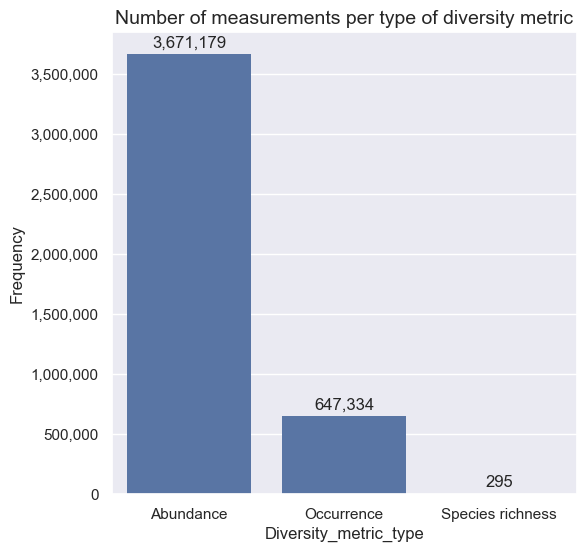

In [23]:
plot_frequencies(
    df_predicts,
    group_col="Diversity_metric_type",
    count_type="measurements",
    title="Number of measurements per type of diversity metric",
    sort_ascending=False,
    flip_axes=False,
)

### Filtering of data for rest of analysis

Since both biodiversity metrics (total abundance and compositional similarity) are abundance-based, we filter the dataframe to only contain abundance measurements.

In [25]:
# Filter dataframe to only include abundance measurements
df_abundance = df_predicts[df_predicts["Diversity_metric_type"] == "Abundance"]

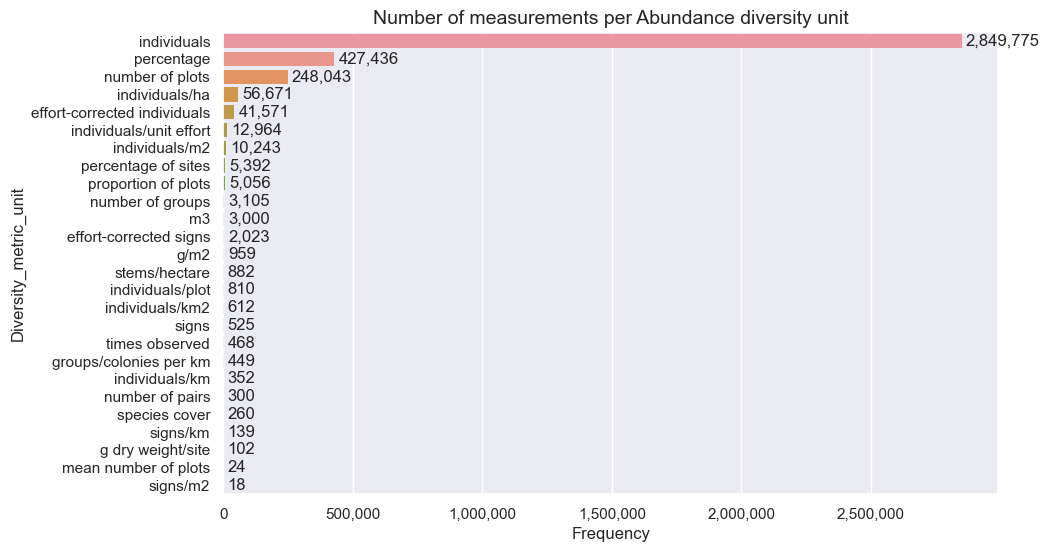

In [26]:
plot_frequencies(
    df_abundance,
    group_col="Diversity_metric_unit",
    count_type="measurements",
    title="Number of measurements per Abundance diversity unit",
    sort_ascending=False,
    flip_axes=True,
)

## Geographic and biogeographic coverage

### Realms and biomes

In [27]:
# List all realms
realms = list(set(df_predicts["Realm"]))
print(realms)

['Afrotropic', 'Oceania', 'Palearctic', 'Indo-Malay', 'Neotropic', 'Australasia', 'Nearctic']


In [28]:
# List all biomes per realm
for realm in realms:
    biomes = list(set(df_predicts[df_predicts["Realm"] == realm]["Biome"]))
    print(f"{realm}: {biomes}\n")

Afrotropic: ['Deserts & Xeric Shrublands', 'Tropical & Subtropical Grasslands, Savannas & Shrublands', 'Mangroves', 'Mediterranean Forests, Woodlands & Scrub', 'Tropical & Subtropical Moist Broadleaf Forests', 'Montane Grasslands & Shrublands', 'Tropical & Subtropical Dry Broadleaf Forests']

Oceania: ['Tropical & Subtropical Dry Broadleaf Forests', 'Tropical & Subtropical Moist Broadleaf Forests']

Palearctic: ['Deserts & Xeric Shrublands', 'Tundra', 'Temperate Conifer Forests', 'Temperate Grasslands, Savannas & Shrublands', 'Mediterranean Forests, Woodlands & Scrub', 'Temperate Broadleaf & Mixed Forests', 'Montane Grasslands & Shrublands', 'Boreal Forests/Taiga']

Indo-Malay: ['Deserts & Xeric Shrublands', 'Temperate Broadleaf & Mixed Forests', 'Tropical & Subtropical Moist Broadleaf Forests', 'Tropical & Subtropical Dry Broadleaf Forests', 'Montane Grasslands & Shrublands', 'Tropical & Subtropical Coniferous Forests', 'Temperate Conifer Forests']

Neotropic: ['Deserts & Xeric Shrubl

### Sites and measurements per biome

In [5]:
plot_frequencies(
    df_abundance,
    group_col="Biome",
    count_type="unique_values",
    title="Number of sampling locations per biome",
    sort_ascending=False,
    flip_axes=True,
)

NameError: name 'df_abundance' is not defined

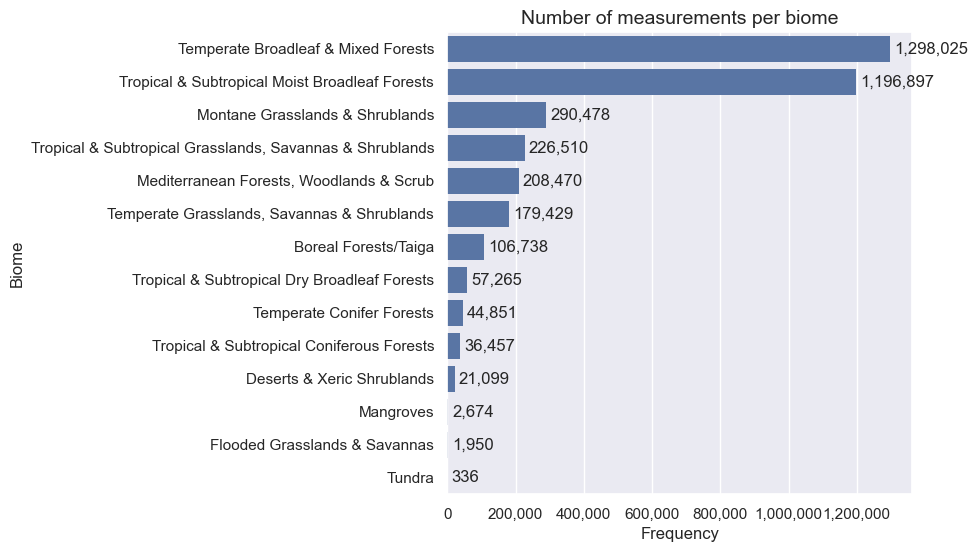

In [29]:
plot_frequencies(
    df_abundance,
    group_col="Biome",
    count_type="measurements",
    title="Number of measurements per biome",
    sort_ascending=False,
    flip_axes=True,
)

### Sites and measurements per UN subregion

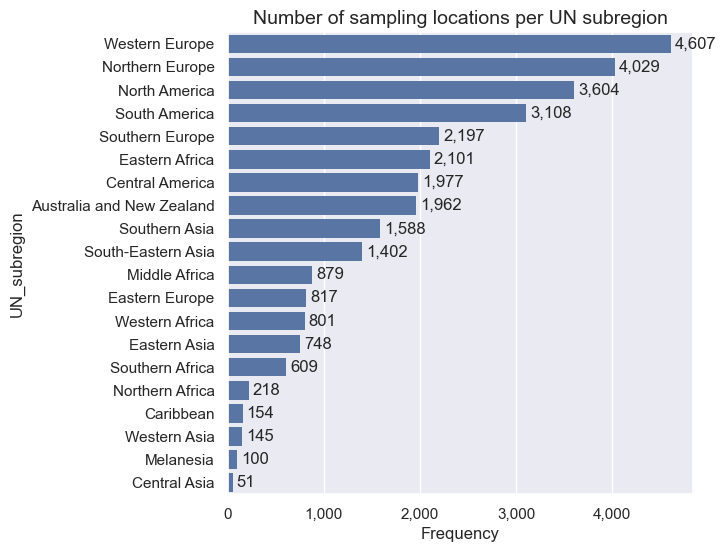

In [30]:
plot_frequencies(
    df_abundance,
    group_col="UN_subregion",
    count_type="unique_values",
    title="Number of sampling locations per UN subregion",
    sort_ascending=False,
    flip_axes=True,
)

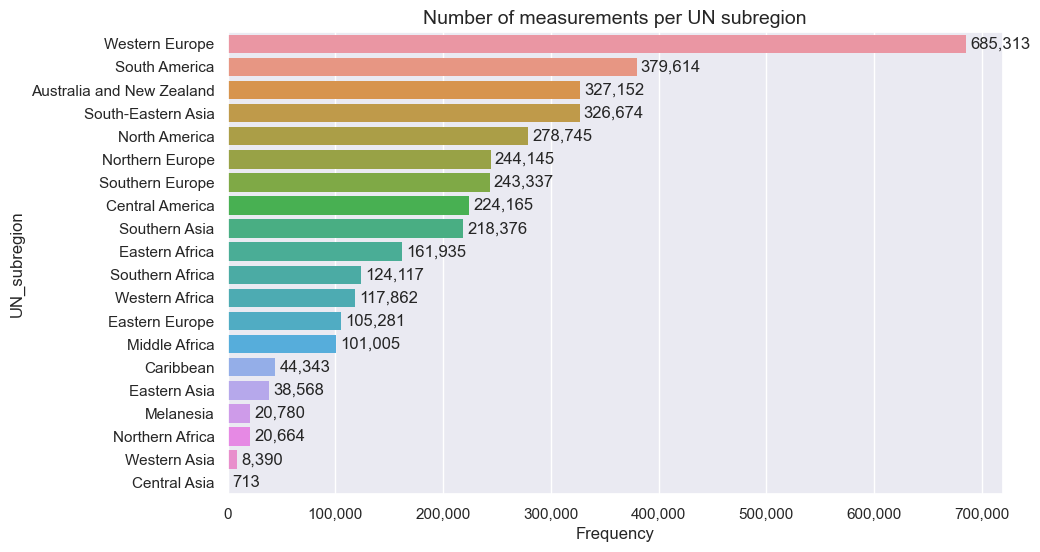

In [32]:
plot_frequencies(
    df_abundance,
    group_col="UN_subregion",
    count_type="measurements",
    title="Number of measurements per UN subregion",
    sort_ascending=False,
    flip_axes=True,
)

## Land use coverage

### Sites and measurements per land-use type and intensity 

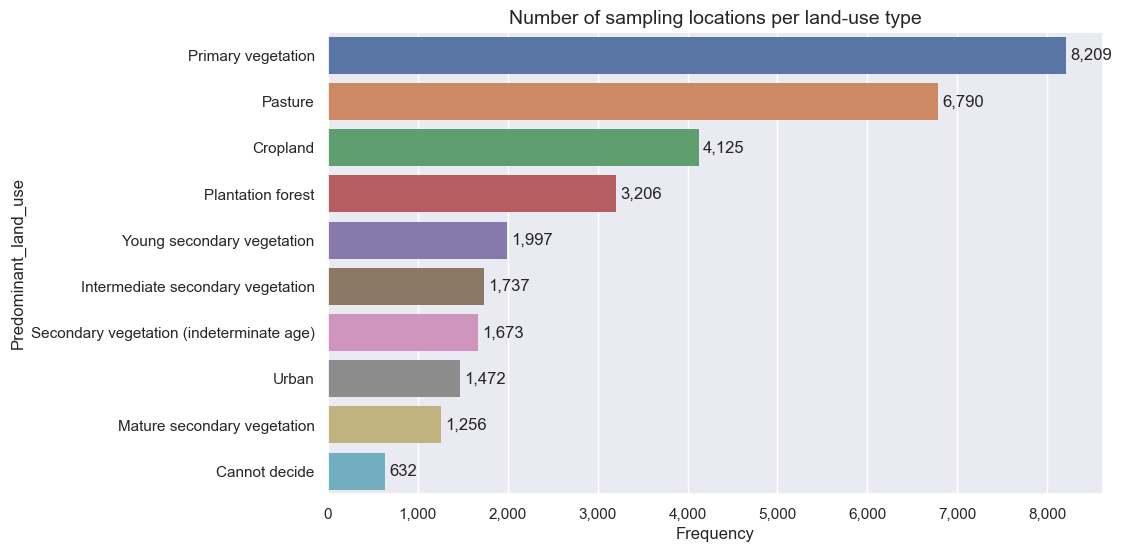

In [33]:
plot_frequencies(
    df_abundance,
    group_col="Predominant_land_use",
    count_type="unique_values",
    title="Number of sampling locations per land-use type",
    sort_ascending=False,
    flip_axes=True,
)

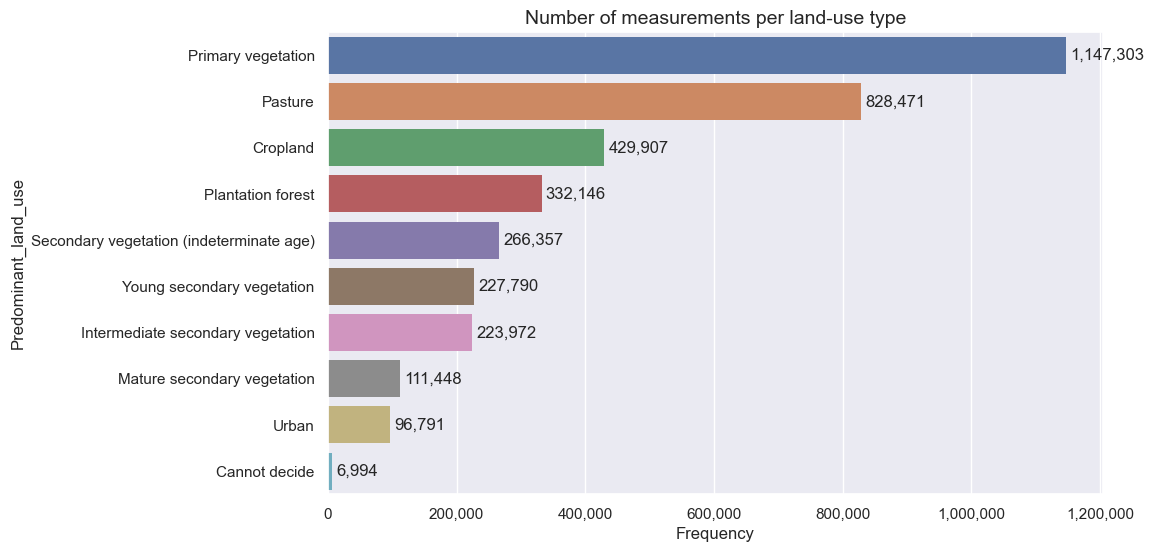

In [34]:
plot_frequencies(
    df_abundance,
    group_col="Predominant_land_use",
    count_type="measurements",
    title="Number of measurements per land-use type",
    sort_ascending=False,
    flip_axes=True,
)

In [35]:
# Create land use type x intensity combinations
df_abundance = df_abundance.copy()
df_abundance["Land_use_type_intensity"] = df_abundance.apply(
    lambda x: f"{x['Predominant_land_use']} x {x['Use_intensity']}", axis=1
)

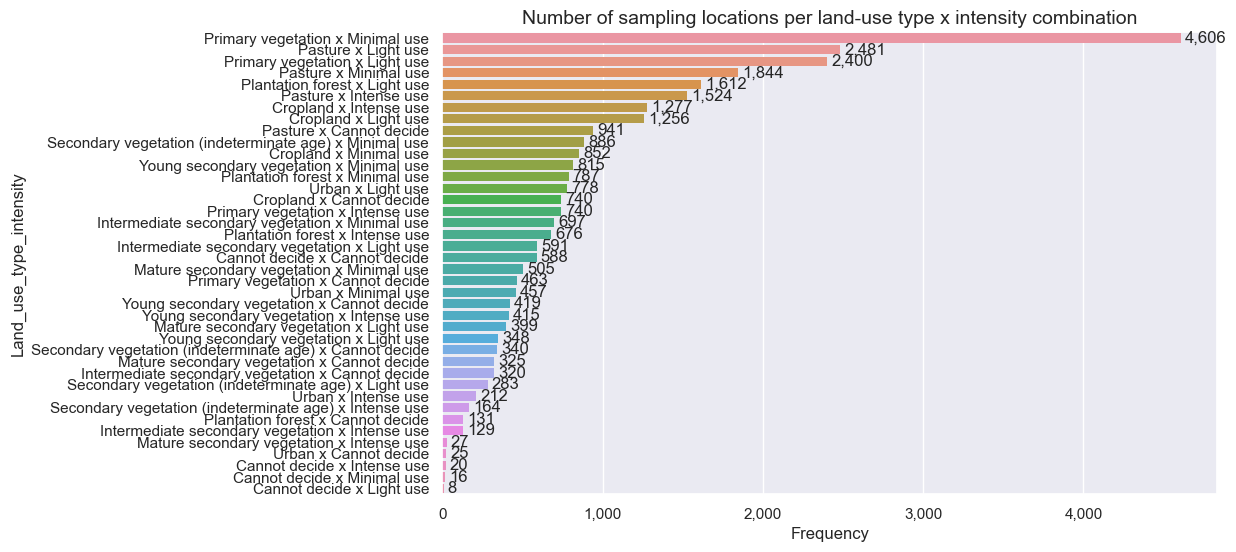

In [36]:
plot_frequencies(
    df_abundance,
    group_col="Land_use_type_intensity",
    count_type="unique_values",
    title="Number of sampling locations per land-use type x intensity combination",
    sort_ascending=False,
    flip_axes=True,
)

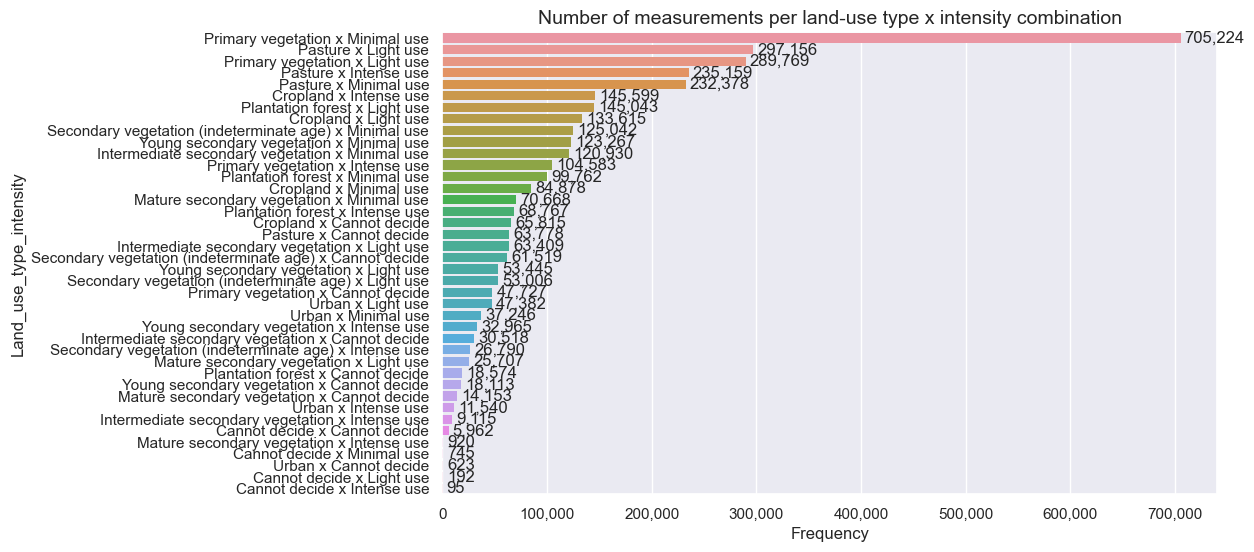

In [37]:
plot_frequencies(
    df_abundance,
    group_col="Land_use_type_intensity",
    count_type="measurements",
    title="Number of measurements per land-use type x intensity combination",
    sort_ascending=False,
    flip_axes=True,
)

## Taxonomic coverage

### Measurements per Kingdom 

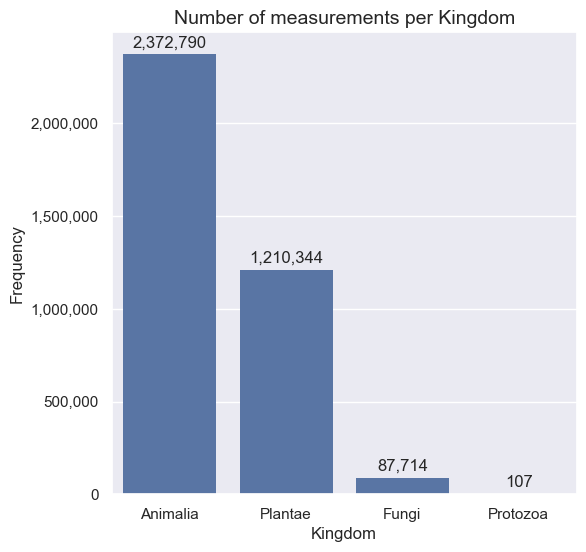

In [31]:
plot_frequencies(
    df_abundance,
    group_col="Kingdom",
    count_type="measurements",
    title="Number of measurements per Kingdom",
    sort_ascending=False,
    flip_axes=False,
)

In [2]:
df_abundance.loc[df_abundance["Kingdom"] == "Animalia"]["Phylum"].unique()

NameError: name 'df_abundance' is not defined

### Measurements per Phylum

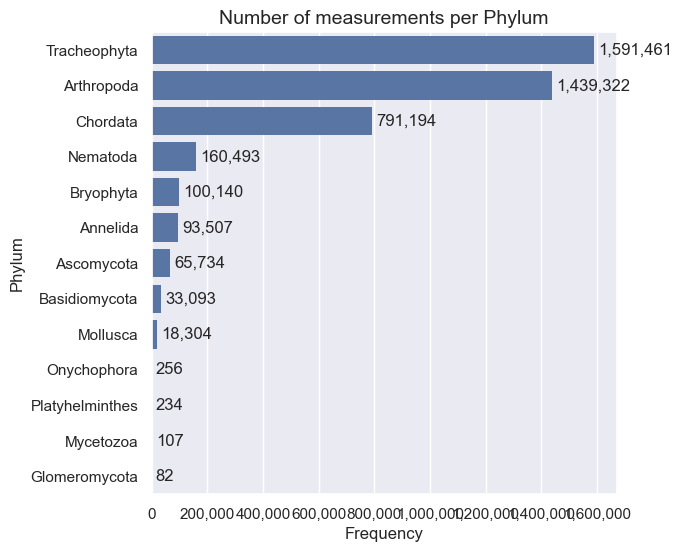

In [34]:
plot_frequencies(
    df_predicts,
    group_col="Phylum",
    count_type="measurements",
    title="Number of measurements per Phylum",
    sort_ascending=False,
    flip_axes=True,
)

### Measurements per Class

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


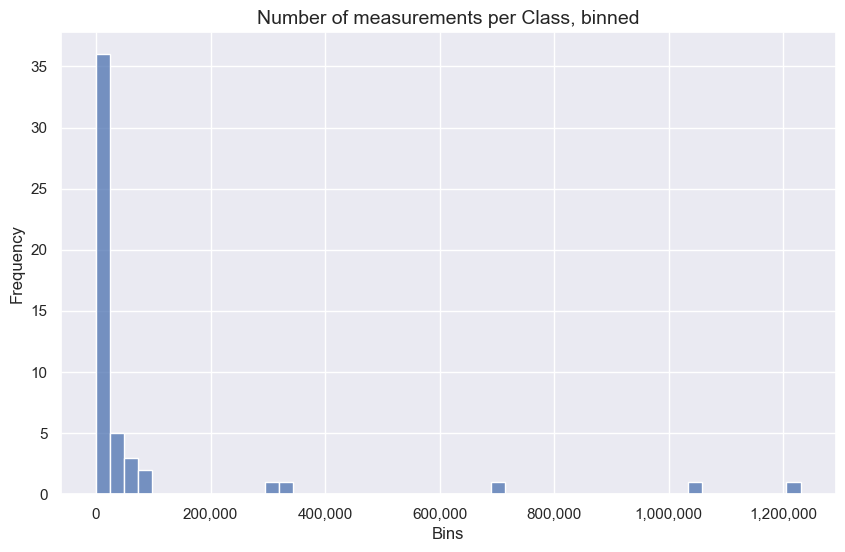

In [40]:
df_class_obs = df_predicts.groupby("Class")["Measurement"].count().reset_index()

plot_histogram_with_density(
    df_class_obs,
    data_col="Measurement",
    title="Number of measurements per Class, binned",
    xlabel="Bins",
    bins=50,
    kde=False,
    lower_lim=None,
    upper_lim=None,
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


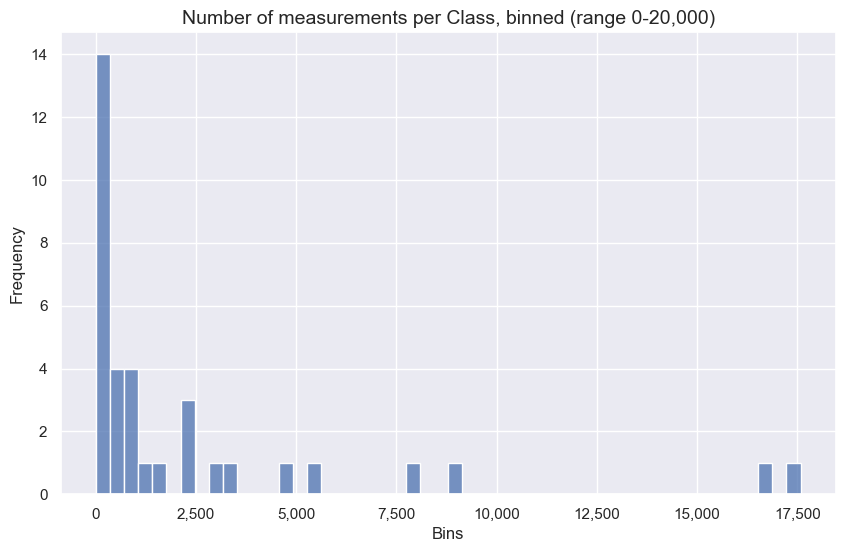

In [41]:
df_class_obs = df_predicts.groupby("Class")["Measurement"].count().reset_index()

plot_histogram_with_density(
    df_class_obs,
    data_col="Measurement",
    title="Number of measurements per Class, binned (range 0-20,000)",
    xlabel="Bins",
    bins=50,
    kde=False,
    lower_lim=None,
    upper_lim=20000,
)

### Measurements per Order

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


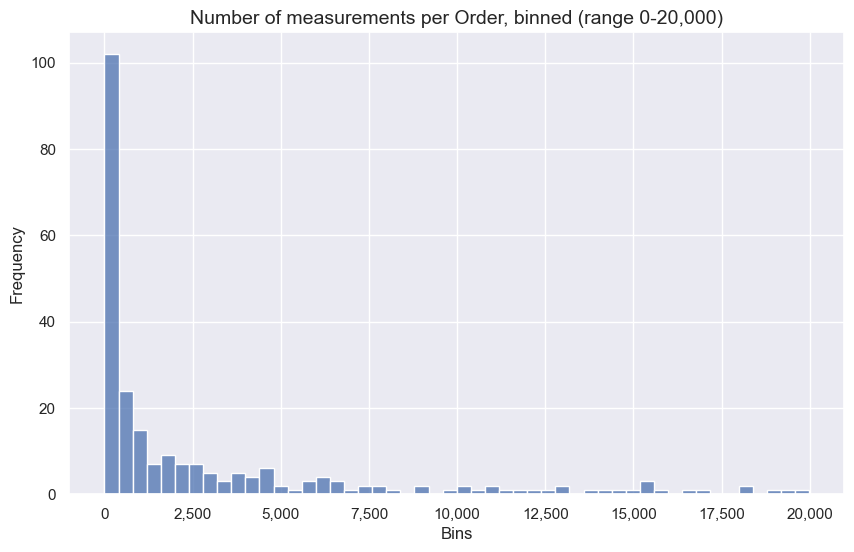

In [42]:
df_order_obs = df_predicts.groupby("Order")["Measurement"].count().reset_index()

plot_histogram_with_density(
    df_order_obs,
    data_col="Measurement",
    title="Number of measurements per Order, binned (range 0-20,000)",
    xlabel="Bins",
    bins=50,
    kde=False,
    lower_lim=None,
    upper_lim=20000,
)

### Measurements per Family

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


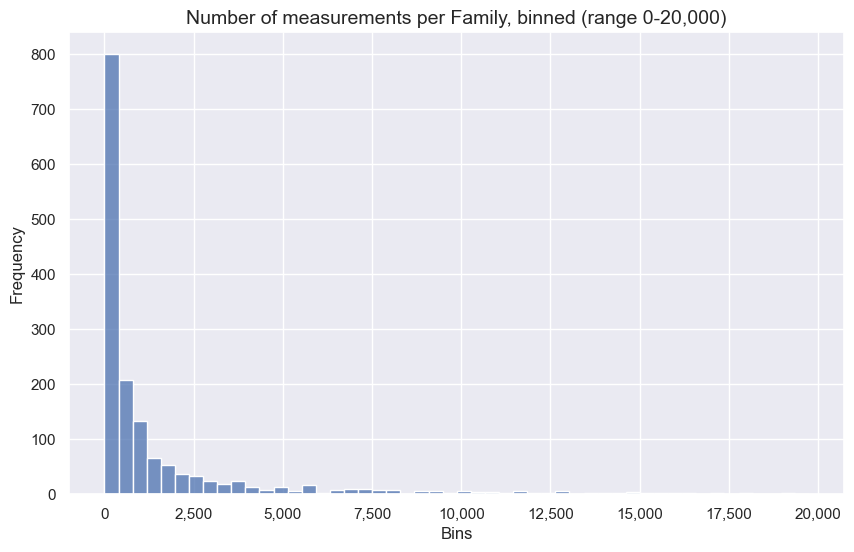

In [43]:
df_family_obs = df_predicts.groupby("Family")["Measurement"].count().reset_index()

plot_histogram_with_density(
    df_family_obs,
    data_col="Measurement",
    title="Number of measurements per Family, binned (range 0-20,000)",
    xlabel="Bins",
    bins=50,
    kde=False,
    lower_lim=None,
    upper_lim=20000,
)

### Deep dive: Sites and measurements for amphibians in Americas

In [44]:
# Filter dataframe for Americas and amphibians
df_americas_amph = df_abundance.loc[
    (df_predicts["UN_region"] == "Americas") & (df_predicts["Class"] == "Amphibia")
]

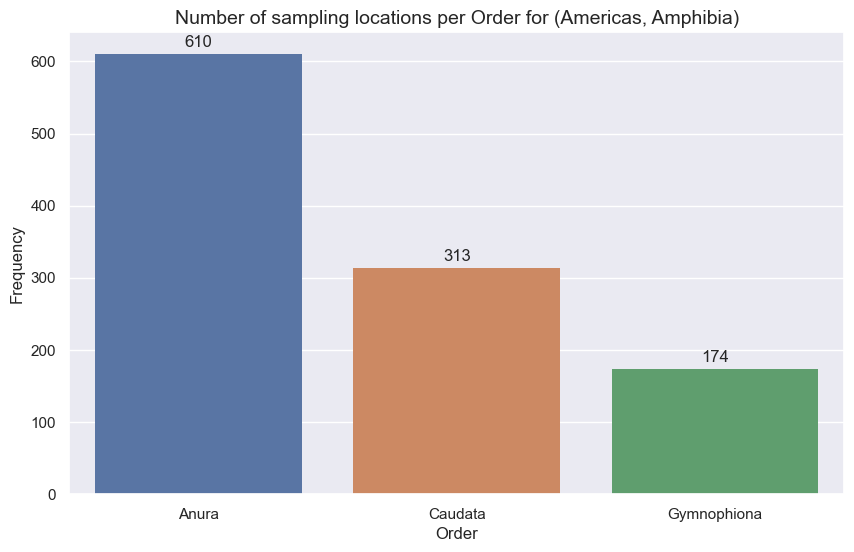

In [47]:
plot_frequencies(
    df_americas_amph,
    group_col="Order",
    count_type="unique_values",
    title="Number of sampling locations per Order for (Americas, Amphibia)",
    sort_ascending=False,
    flip_axes=False,
)

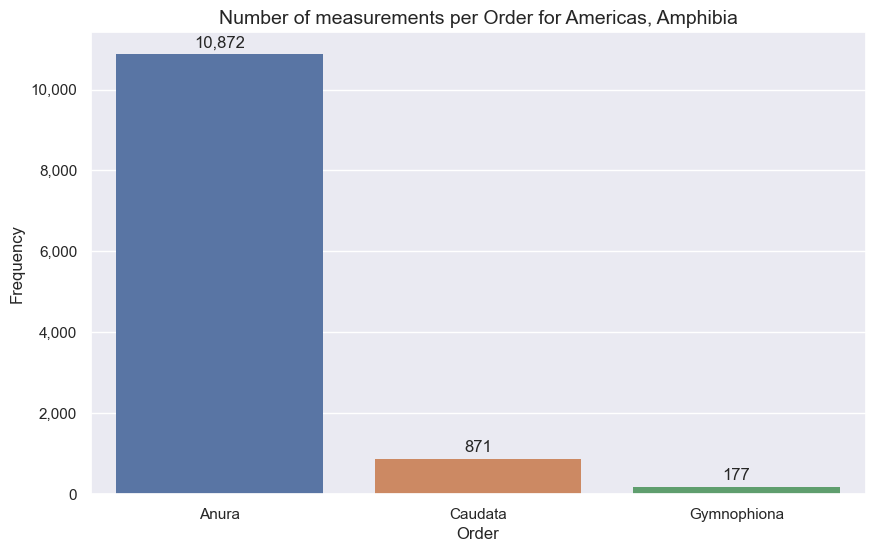

In [48]:
plot_frequencies(
    df_americas_amph,
    group_col="Order",
    count_type="measurements",
    title="Number of measurements per Order for Americas, Amphibia",
    sort_ascending=False,
    flip_axes=False,
)

## Distribution of abundance data

We use effort corrected measurement data, to get as close as possible to true abundance with the data we have. We also drop cases where land use type is unknown.

In [258]:
# Drop entries where land use type is unknown
df_abundance = df_abundance.dropna(subset=["Predominant_land_use"])

### Individual count data

In [259]:
# Filter dataframe to only include abundance given as count of individuals
df_abund_ind = df_abundance[df_abundance["Diversity_metric_unit"] == "individuals"]

In [260]:
# Check some summary statistics of the data
stats = ["mean", "median", "min", "max", "std"]
df_abund_ind["Effort_corrected_measurement"].agg(stats)

mean          23.286306
median         0.000000
min            0.000000
max       394656.000000
std          575.712881
Name: Effort_corrected_measurement, dtype: float64

In [261]:
# Do the same analysis, but averaged across sites
df_agg_stats = (
    df_abund_ind.groupby("SSBS")["Effort_corrected_measurement"]
    .agg(stats)
    .reset_index()
)
df_agg_stats.drop("SSBS", axis="columns").mean()

mean       17.585171
median      1.519691
min         1.256337
max       842.852137
std        85.708034
dtype: float64

### Log transformed count of individuals

In [262]:
# Calculate total abundance for each site
df_ind_count_per_site = (
    df_abund_ind.groupby("SSBS")["Effort_corrected_measurement"]
    .sum()
    .reset_index()
    .rename(columns={"Effort_corrected_measurement": "Tot_abundance"})
)

# Do log(x + 1) transformation of abundance numbers
df_ind_count_log = df_ind_count_per_site.copy()
df_ind_count_log.loc[:, "Tot_abundance_log"] = np.log(
    df_ind_count_log["Tot_abundance"] + 1
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


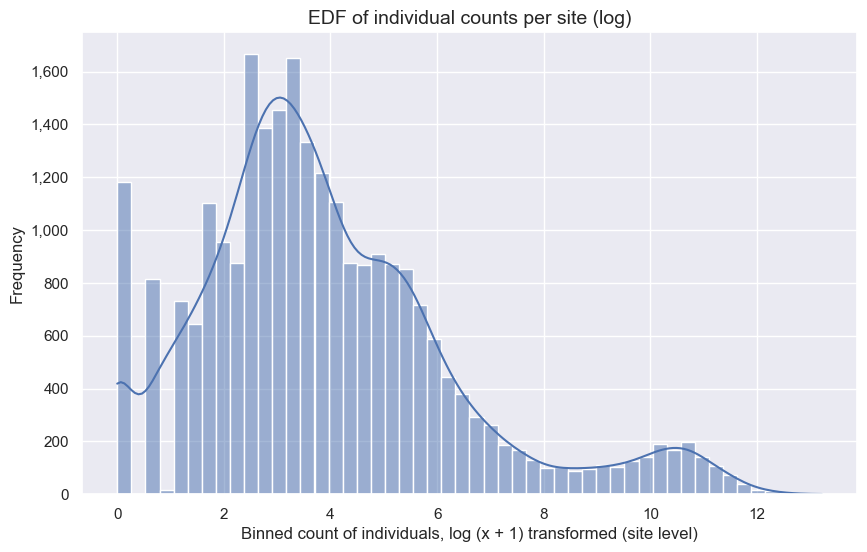

In [263]:
plot_histogram_with_density(
    df_ind_count_log,
    data_col="Tot_abundance_log",
    title="EDF of individual counts per site (log)",
    xlabel="Binned count of individuals, log (x + 1) transformed (site level)",
    bins=50,
    kde=True,
)

**Comment:** The log transformed count data follows a complex, multimodal distribution with three peaks: at zero, around 3 and around 11. The two density peaks at 3 and 11 can indicate differences in the taxonomic focus of different studies (with frequent and rarer species).

### Capped count of individuals 

In [264]:
# Perform similar analysis, but instead of log transform, filter out large values
upper_lim = 100

# Filter data for upper limit
df_ind_count_lim = df_ind_count_per_site[
    df_ind_count_per_site["Tot_abundance"] <= upper_lim
]

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


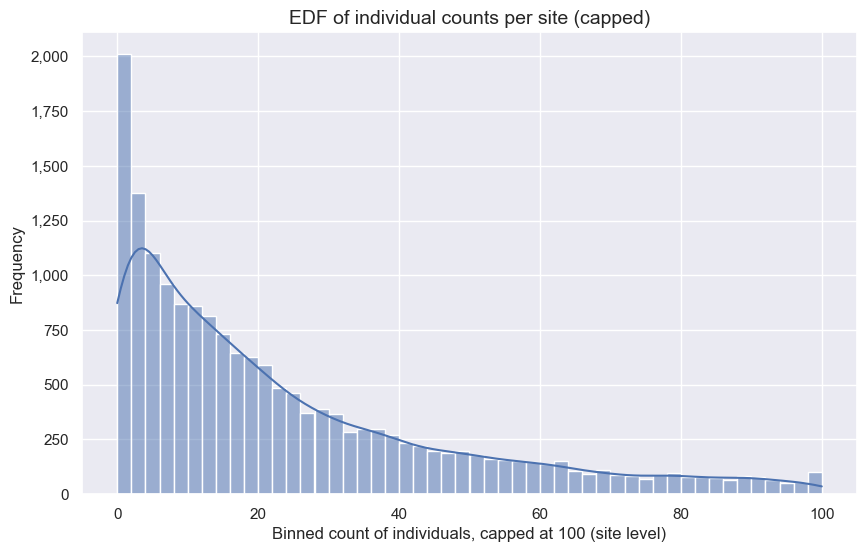

In [265]:
plot_histogram_with_density(
    df_ind_count_lim,
    data_col="Tot_abundance",
    title="EDF of individual counts per site (capped)",
    xlabel=f"Binned count of individuals, capped at {upper_lim} (site level)",
    bins=50,
    kde=True,
)

**Comment:** Untransformed count data is approx Poisson, but possibly with a higher frequency of zeros than the standard model would assume. 

### Abundance data dispersion

In [266]:
# Calculate std-mean ratio
df_agg_stats_dropna = df_agg_stats.dropna(subset=["mean", "std"]).copy()
df_agg_stats_dropna["Std_mean_ratio"] = (
    df_agg_stats_dropna["std"] / df_agg_stats_dropna["mean"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


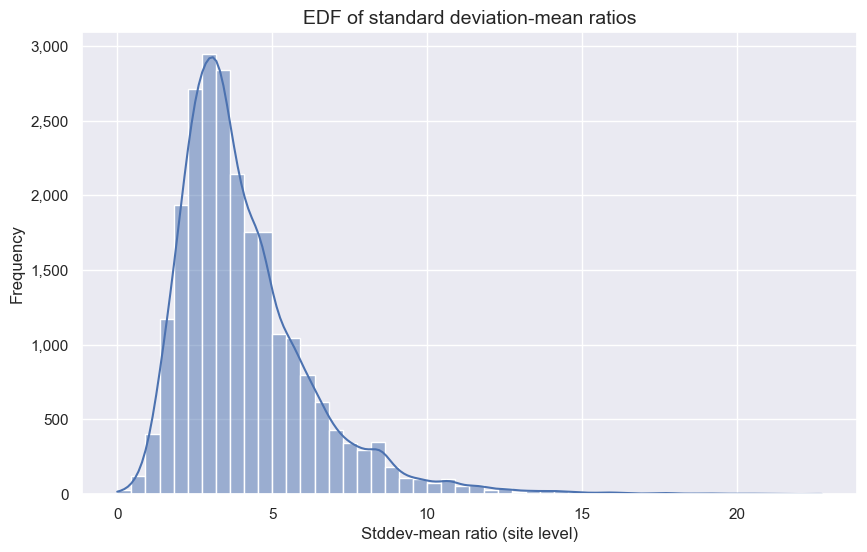

In [267]:
plot_histogram_with_density(
    df_agg_stats_dropna,
    data_col="Std_mean_ratio",
    title="EDF of standard deviation-mean ratios",
    xlabel="Stddev-mean ratio (site level)",
    bins=50,
    kde=True,
)

**Comment:** If we compare to a Poisson model, which assumes equal mean and variance, the data is highly overdispersed. That would speak in favor for using a Negative-Binomial distribution for count data. Still there are a few instances where data is underdispersed. 

### 0-1 scaled abundance data

This includes all abundance measurements, not just the ones reported as counts of individuals.

In [306]:
# Calculate the total abundance for each site, grouped by study
df_study_site_abund = df_abundance.copy()
df_study_site_abund = (
    df_study_site_abund.groupby(["SS", "SSBS"])["Effort_corrected_measurement"]
    .sum()
    .reset_index()
    .rename(columns={"Effort_corrected_measurement": "Site_abundance"})
)

In [307]:
# Calculate the max and min total abundance within each study
df_study_min_max = (
    (df_study_site_abund.groupby("SS")["Site_abundance"].agg(["min", "max"]))
    .reset_index()
    .rename(columns={"min": "Min_abundance", "max": "Max_abundance"})
)

In [308]:
# Join the first and second dataframes on study
df_study_site_scaled = df_study_site_abund.join(
    df_study_min_max.set_index("SS"), on="SS", how="left", validate="m:1"
)

In [309]:
# Perform min-max scaling of site-level abundance
abund = df_study_site_scaled["Site_abundance"]
min_abund = df_study_site_scaled["Min_abundance"]
max_abund = df_study_site_scaled["Max_abundance"]
df_study_site_scaled["Abundance_scaled"] = (abund - min_abund) / (max_abund - min_abund)

### Distribution with standard min-max scaling

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


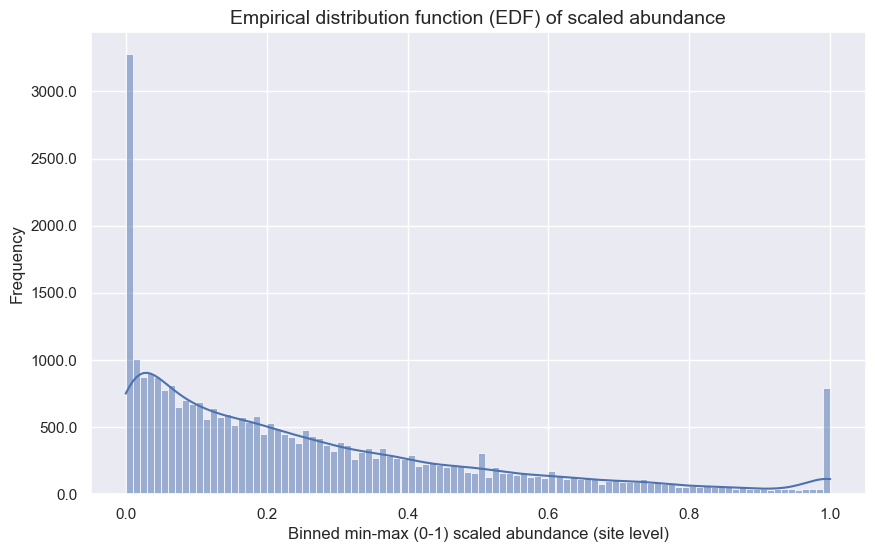

In [310]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Abundance_scaled",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Binned min-max (0-1) scaled abundance (site level)",
    bins=100,
    kde=True,
)

### Distribution of abundance / max(abundances in study)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


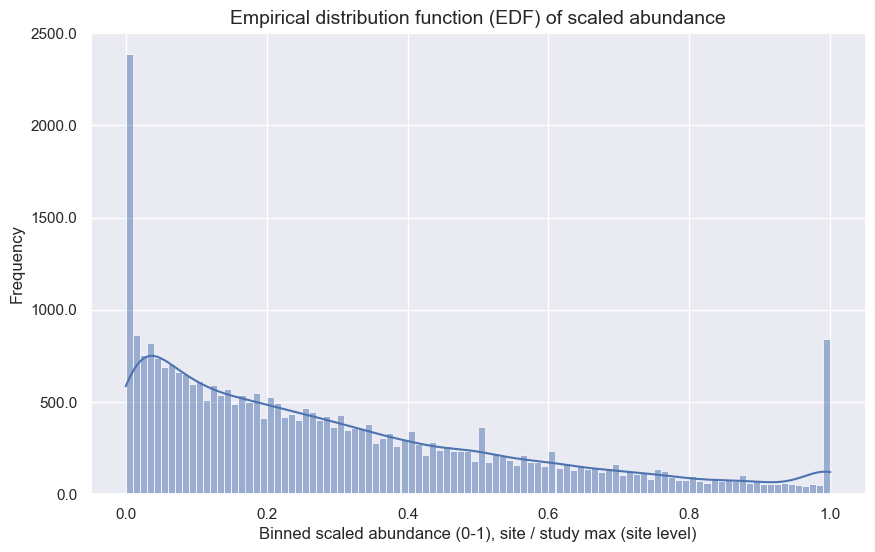

In [311]:
# The BII authors don't do min-max scaling, they do abundance / max_abundance
df_study_site_scaled["Abundance_scaled_BII"] = abund / max_abund

plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Abundance_scaled_BII",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Binned scaled abundance (0-1), site / study max (site level)",
    bins=100,
    kde=True,
)

**Comment:** This should be possible to approximate with a zero-one inflated Beta regression. The BII version is less zero-inflated than using min-max scaling, which could be a benefit. The analysis below is based on this measure.

In [312]:
# Check percentage of exact 0s and 1s in the data
total_obs = len(df_study_site_scaled)
min_max_zeros = (
    len(df_study_site_scaled.loc[df_study_site_scaled["Abundance_scaled"] == 0])
    / total_obs
)
print(min_max_zeros)
min_max_ones = (
    len(df_study_site_scaled.loc[df_study_site_scaled["Abundance_scaled"] == 1])
    / total_obs
)
print(min_max_ones)
max_zeros = (
    len(df_study_site_scaled.loc[df_study_site_scaled["Abundance_scaled_BII"] == 0])
    / total_obs
)
print(max_zeros)
max_ones = (
    len(df_study_site_scaled.loc[df_study_site_scaled["Abundance_scaled_BII"] == 1])
    / total_obs
)
print(max_ones)

0.06904202977779207
0.024536128887030904
0.04334823294851593
0.024536128887030904


### Transformation of the scaled abundance

The authors of BII apply a square-root transformation to the scaled data, then assume that residuals are Gaussian. They also tried a log transformation. We compare both approaches below.

In [313]:
# Do square-root transformation of the scaled data
df_study_site_scaled["Scaled_abund_sqrt"] = np.sqrt(
    df_study_site_scaled["Abundance_scaled_BII"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


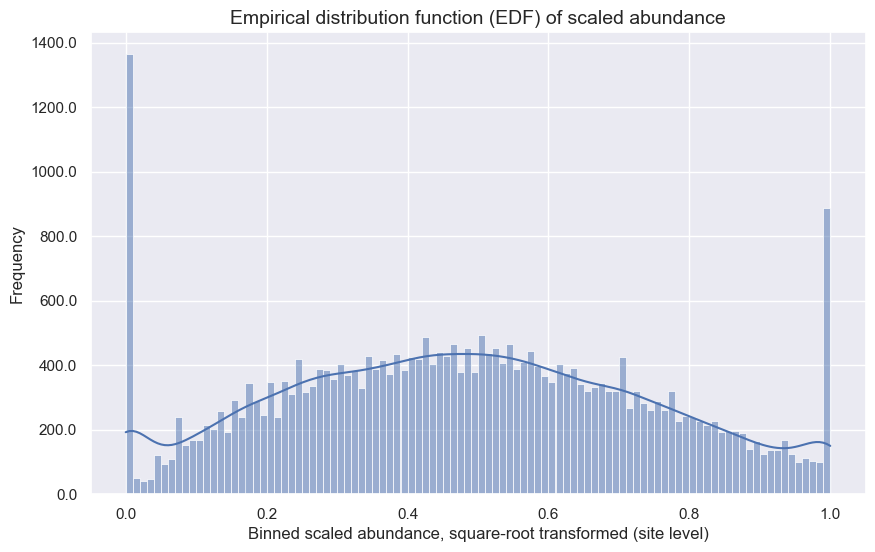

In [314]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Scaled_abund_sqrt",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Binned scaled abundance, square-root transformed (site level)",
    bins=100,
    kde=True,
)

**Comment:** This could be approximated with a zero-one inflated Beta or logit-Normal distribution. While a transformation on top of a transformation might not be ideal, we can try if sqrt improves the model fit and predictions.

In [315]:
# Do log transformation of the scaled data
df_study_site_scaled["Scaled_abund_log"] = np.log(
    df_study_site_scaled["Abundance_scaled_BII"] + 1
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


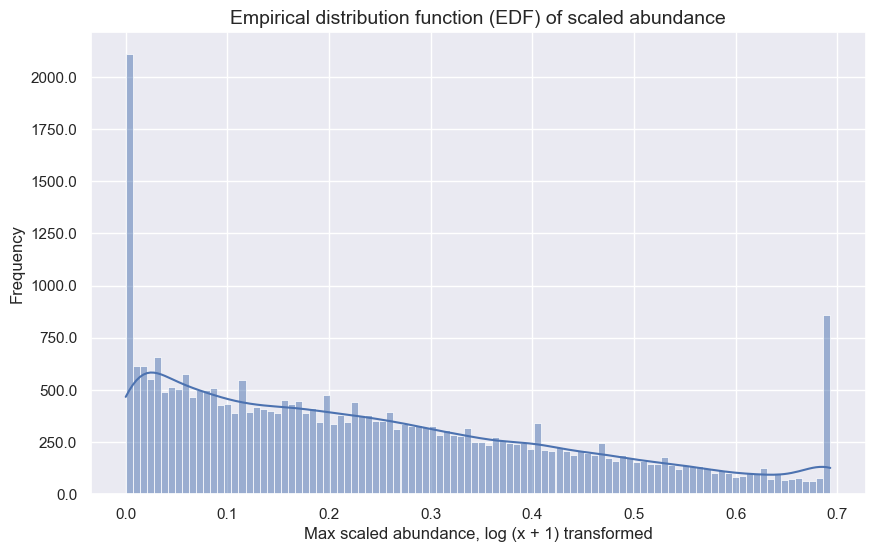

In [316]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Scaled_abund_log",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Max scaled abundance, log (x + 1) transformed",
    bins=100,
    kde=True,
)

In [317]:
# Do logit transformation of the scaled data


def logit(abund):
    adjust = 0.001

    if abund == 0:
        res = scipy.special.logit(abund + adjust)
    elif abund == 1:
        res = scipy.special.logit(abund - adjust)
    else:
        res = scipy.special.logit(abund - adjust)

    return res

In [318]:
df_study_site_scaled = df_study_site_scaled.copy()
df_study_site_scaled["Scaled_abund_logit"] = df_study_site_scaled[
    "Abundance_scaled_BII"
].apply(lambda row: logit(row))

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


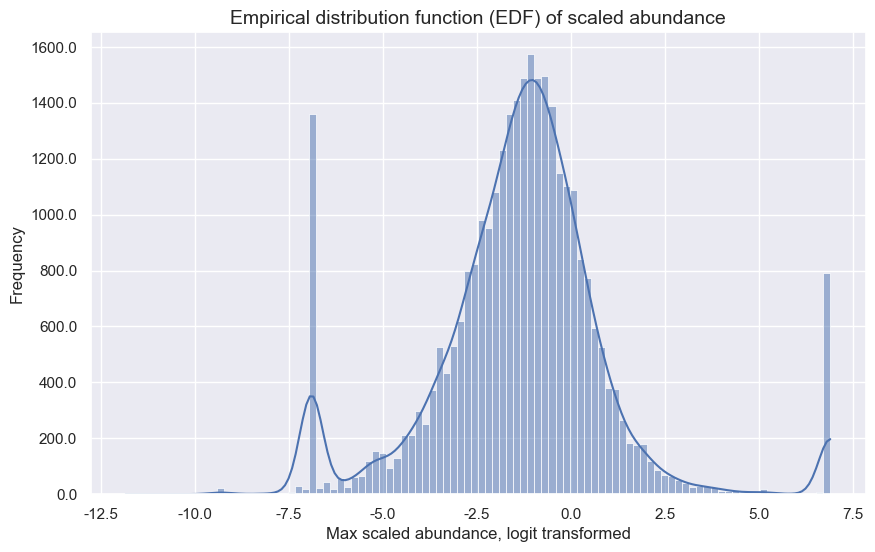

In [319]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Scaled_abund_logit",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Max scaled abundance, logit transformed",
    bins=100,
    kde=True,
)

### Alternative scaling approach: Average scaling

To avoid the inflation of ones, we divide each abundance with the within-study average.

In [280]:
# Calculate the max and min total abundance within each study
df_study_mean = (
    df_study_site_abund.groupby("SS")["Site_abundance"]
    .mean()
    .reset_index()
    .rename(columns={"Site_abundance": "Mean_abundance"})
)

In [281]:
# Join the new column to the existing dataframe
df_study_site_scaled = df_study_site_scaled.join(
    df_study_mean.set_index("SS"), on="SS", how="left", validate="m:1"
)

# Calculate the new scaled numbers
df_study_site_scaled["Abundance_scaled_mean"] = (
    abund / df_study_site_scaled["Mean_abundance"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


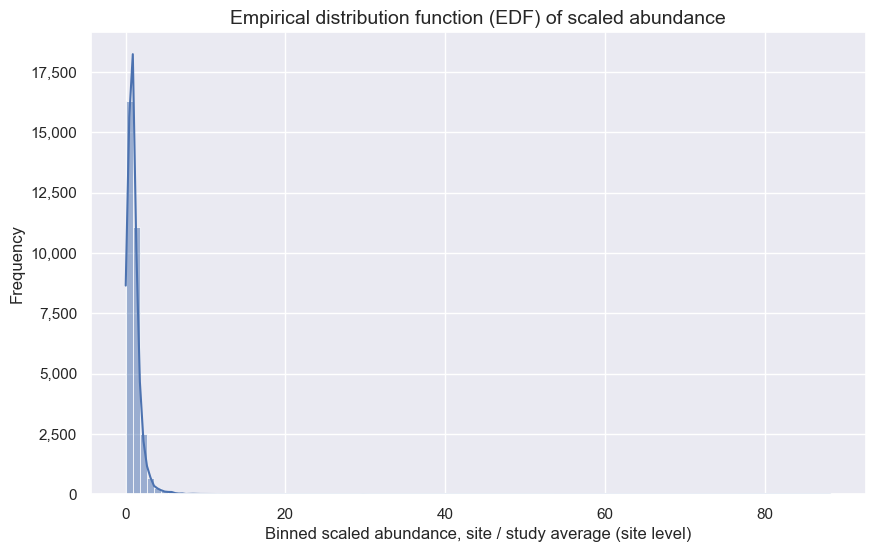

In [301]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Abundance_scaled_mean",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Binned scaled abundance, site / study average (site level)",
    bins=100,
    kde=True,
)

### Transformations of the average-scaled data

In [283]:
df_study_site_scaled = df_study_site_scaled.copy()

# Log
df_study_site_scaled["Scaled_abund_mean_log"] = np.log(
    df_study_site_scaled["Abundance_scaled_mean"] + 1
)

# Square-root
df_study_site_scaled = df_study_site_scaled.copy()
df_study_site_scaled["Scaled_abund_mean_sqrt"] = np.sqrt(
    df_study_site_scaled["Abundance_scaled_mean"]
)
# Cube-root
df_study_site_scaled = df_study_site_scaled.copy()
df_study_site_scaled["Scaled_abund_mean_cbrt"] = np.cbrt(
    df_study_site_scaled["Abundance_scaled_mean"]
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


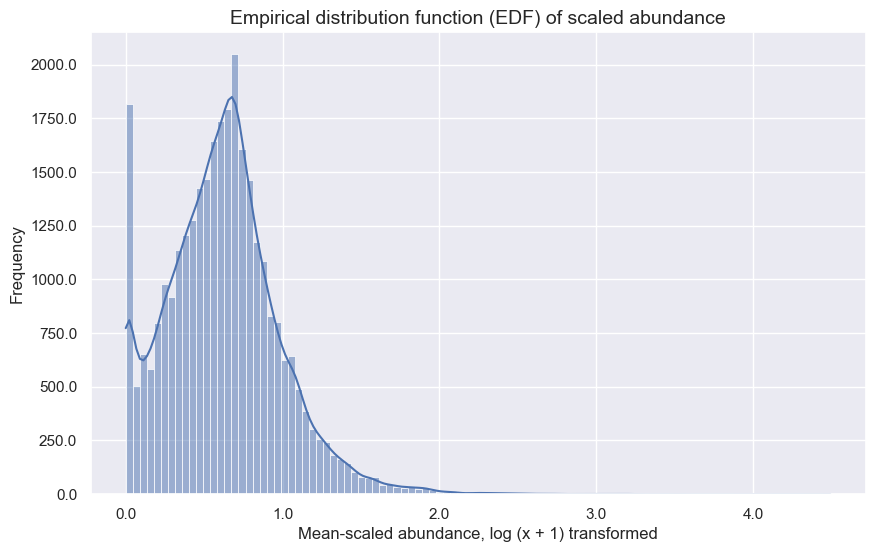

In [302]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Scaled_abund_mean_log",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Mean-scaled abundance, log (x + 1) transformed",
    bins=100,
    kde=True,
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


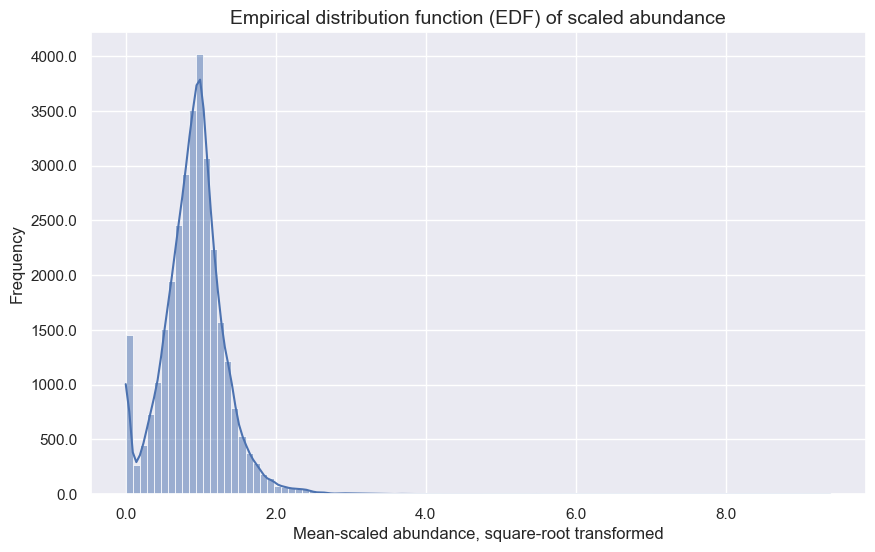

In [303]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Scaled_abund_mean_sqrt",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Mean-scaled abundance, square-root transformed",
    bins=100,
    kde=True,
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


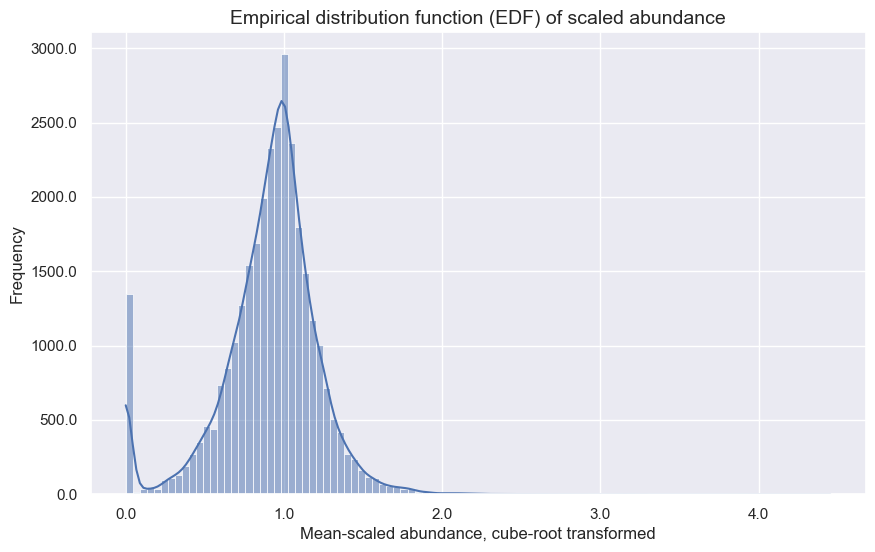

In [304]:
plot_histogram_with_density(
    df_study_site_scaled,
    data_col="Scaled_abund_mean_cbrt",
    title="Empirical distribution function (EDF) of scaled abundance",
    xlabel="Mean-scaled abundance, cube-root transformed",
    bins=100,
    kde=True,
)

## Distribution of compositional similarity

In [320]:
# Load the complete data set, this time using polars
df_predicts = pl.read_csv("../../data/PREDICTS/merged_data.csv")

In [321]:
df_abundance = df_predicts.filter(pl.col("Diversity_metric_type") == "Abundance")

In [322]:
# Identify studies with consistent sampling effort across sites
single_effort_studies = (
    df_abundance.group_by("SS")
    .agg(pl.col("Sampling_effort").n_unique().alias("unique_effort"))
    .filter(pl.col("unique_effort") == 1)
    .get_column("SS")
    .to_list()
)

In [323]:
# Identify studies where at least one site is minimally-used primary vegetation
min_primary_studies = (
    df_abundance.filter(
        (pl.col("Predominant_land_use") == "Primary vegetation")
        & (pl.col("Use_intensity") == "Minimal use")
    )
    .get_column("SS")
    .unique()
    .to_list()
)

In [324]:
# Identify studies with more than one taxon surveyed
multi_taxa_studies = (
    df_abundance.group_by("SS")
    .agg(pl.col("Taxon_name_entered").n_unique().alias("unique_taxon"))
    .filter(pl.col("unique_taxon") > 1)
    .get_column("SS")
    .unique()
    .to_list()
)

In [118]:
# Filter the original dataframe for all of these criteria
studies_to_include = list(
    set(single_effort_studies) & set(min_primary_studies) & set(multi_taxa_studies)
)
df_similarity_calc = df_abundance.filter(pl.col("SS").is_in(studies_to_include))
len(studies_to_include)

244

In [149]:
# List of all studies, and list for storing results
studies = df_similarity_calc.get_column("SS").unique().to_list()
results = []

start = time.time()

# Iterate through all studies
for study in studies:
    df_study = df_similarity_calc.filter((pl.col("SS") == study)).lazy()
    results = pairwise_similarity_scores(study, df_study, results)

end = time.time()
print(end - start)

# Create a dataframe from the output of all site pairs
df_comp_similarity = pl.DataFrame(results)

968.3015460968018


In [150]:
df_comp_similarity.shape

(586660, 4)

In [142]:
def pairwise_similarity_scores(study, df, results):

    # Get a list of all minimal-primary sites
    min_primary_sites = (
        df.filter(
            (pl.col("Predominant_land_use") == "Primary vegetation")
            & (pl.col("Use_intensity") == "Minimal use")
        )
        .collect()
        .get_column("SSBS")
        .unique()
        .to_list()
    )
    # Then get a list of all the sites
    all_sites = df.collect().get_column("SSBS").unique().to_list()

    # Apply the Bray-Curtis function to every pair of sites
    for site_1 in min_primary_sites:
        for site_2 in all_sites:
            if site_1 != site_2:
                score = calculate_bray_curtis(df, study, site_1, site_2)
                results.append(score)
            else:
                continue

    return results

In [144]:
def calculate_bray_curtis(
    df: pd.DataFrame, study: str, site_1: str, site_2: str
) -> dict:
    """
    Calculate the Bray-Curtis similarity metric between a pair of sites
    from the same study.

    Args:
        df (pd.DataFrame): Dataframe filtered for the study in question.
        study (str): The study being evaluated.
        site_1 (str): A minimally-used primary vegation site from the study.
        site_2 (str): Any other site in that study.

    Returns
        bray_curtis_output (dict): Dictionary with the Bray-Curtis score of
        the two sites, and IDs for the study and sites.
    """

    # Create two dataframes with required information about both sites
    # Since sampling effort is consistent, we use raw Measurement
    df_site_1 = (
        df.filter(pl.col("SSBS") == site_1)
        .select(["SSBS", "Taxon_name_entered", "Measurement"])
        .sort("Taxon_name_entered")
        .collect()
    )
    df_site_2 = (
        df.filter(pl.col("SSBS") == site_2)
        .select(["SSBS", "Taxon_name_entered", "Measurement"])
        .sort("Taxon_name_entered")
        .collect()
    )

    # Calculate the total abundance of each site
    s1_tot_abund = df_site_1.get_column("Measurement").sum()
    s2_tot_abund = df_site_2.get_column("Measurement").sum()

    # Handle cases where one or both sites have zero abundance
    if s1_tot_abund == 0 and s2_tot_abund == 0:
        bray_curtis = np.nan
    elif s1_tot_abund == 0 or s2_tot_abund == 0:
        bray_curtis = 0

    # Case where both sites have abundance values
    else:
        # Get lists of taxons for each site
        s1_taxa = df_site_1.get_column("Taxon_name_entered").to_list()
        s2_taxa = df_site_2.get_column("Taxon_name_entered").to_list()

        # Check if the list of taxons are identical
        # Then we can directly convert measurements to a numpy array
        if set(s1_taxa) == set(s2_taxa) and len(df_site_1) == len(df_site_2):
            pairwise_abundance = np.column_stack(
                (
                    df_site_1.get_column("Measurement"),
                    df_site_2.get_column("Measurement"),
                )
            )

        # Otherwise we need to do a merge of dataframes first
        else:
            # Do an outer merge on taxon name and fill any non-overlapping taxons with zeros
            df_merged = df_site_1.join(
                df_site_2,
                on="Taxon_name_entered",
                how="outer",
                suffix="_site2",
            )
            df_merged = df_merged.fill_nan(0)

            # Covert to numpy array
            pairwise_abundance = np.column_stack(
                (
                    df_merged.get_column("Measurement"),
                    df_merged.get_column("Measurement_site2"),
                ),
            )

        # Calculate the sum of pair-wise minimum abundance
        min_abundance_sum = np.sum(np.min(pairwise_abundance, axis=1))

        # Calculate the similarity version of the Bray-Curtis dissimilarity metric
        # A value of 1 means that the two sites are identical in composition
        bray_curtis = (2 * min_abundance_sum) / (s1_tot_abund + s2_tot_abund)

    # Create and output dictionary
    bray_curtis_output = {
        "SS": study,
        "Primary_minimal_site": site_1,
        "Other_site": site_2,
        "Similarity_score": bray_curtis,
    }

    return bray_curtis_output

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


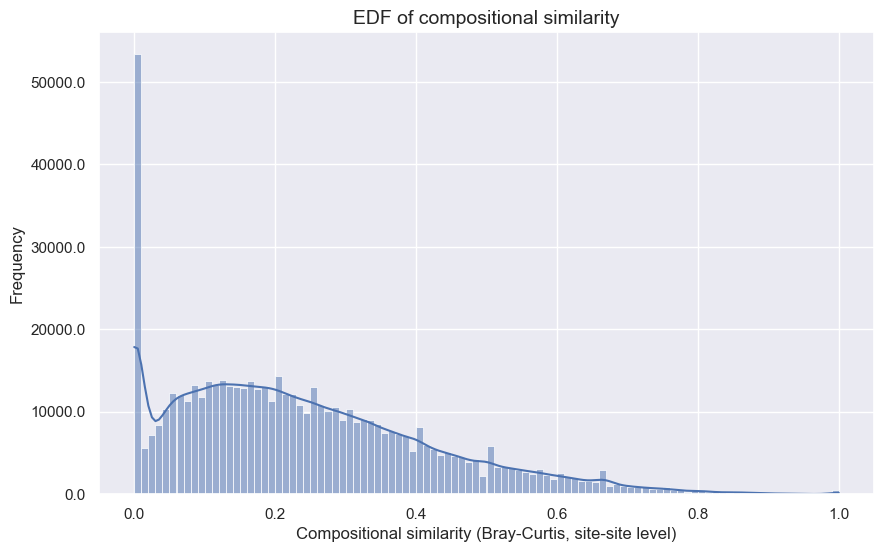

In [325]:
plot_histogram_with_density(
    df_comp_similarity,
    data_col="Similarity_score",
    title="EDF of compositional similarity",
    xlabel="Compositional similarity (Bray-Curtis, site-site level)",
    bins=100,
    kde=True,
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


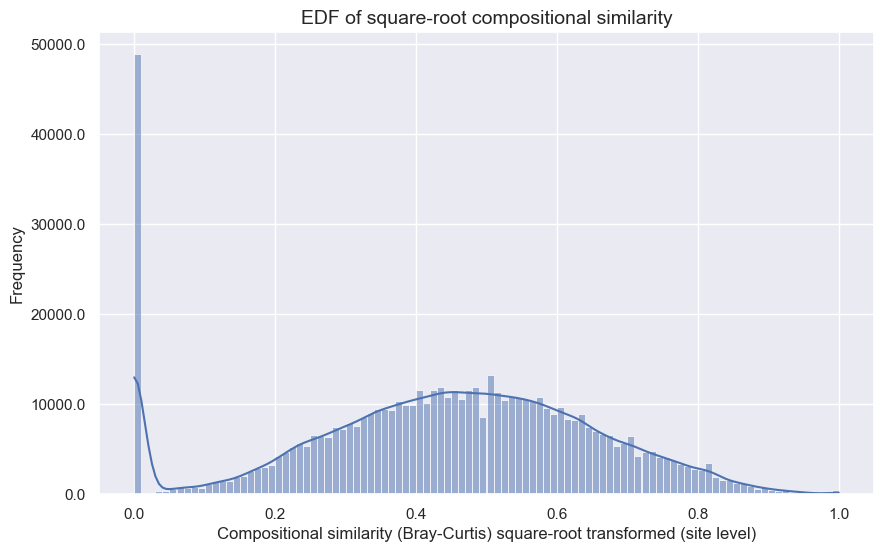

In [326]:
# Do a square-root transformation of the similarity scores
df_comp_similarity = df_comp_similarity.with_columns(
    np.sqrt(pl.col("Similarity_score")).alias("Similarity_score_sqrt")
)

plot_histogram_with_density(
    df_comp_similarity,
    data_col="Similarity_score_sqrt",
    title="EDF of square-root compositional similarity",
    xlabel="Compositional similarity (Bray-Curtis) square-root transformed (site level)",
    bins=100,
    kde=True,
)

**Comment**: Similar distribution as abundance, except that there is not one-inflation. 

The BII authors actually used a logit transformation of the compositional similarity, which we try below.

In [334]:
df_comp_similarity = df_comp_similarity.drop("Similarity_score_logit")

In [335]:
# Do a logit transformation of the similarity scores
df_comp_similarity = df_comp_similarity.with_columns(
    pl.col("Similarity_score")
    .map_elements(lambda x: logit(x))
    .alias("Similarity_score_logit")
)

/Users/jakobnystrom/anaconda3/envs/biodiv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


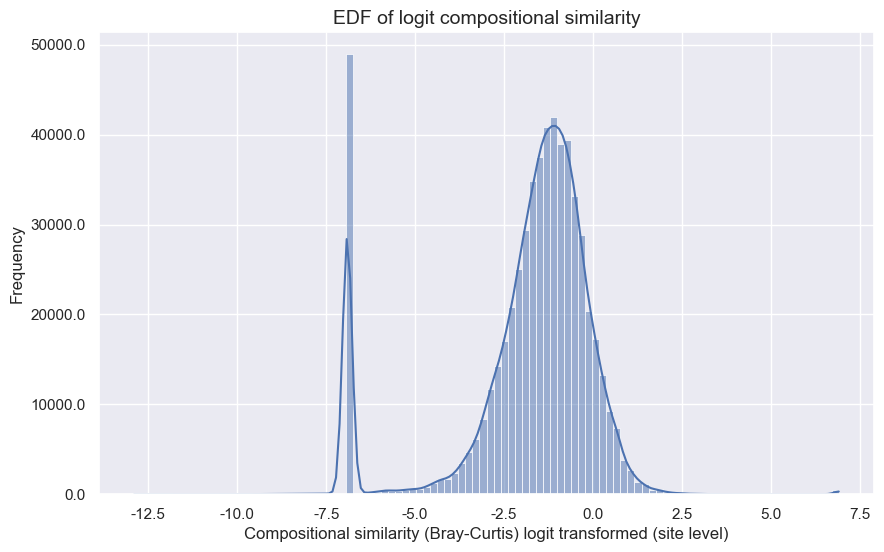

In [336]:
plot_histogram_with_density(
    df_comp_similarity,
    data_col="Similarity_score_logit",
    title="EDF of logit compositional similarity",
    xlabel="Compositional similarity (Bray-Curtis) logit transformed (site level)",
    bins=100,
    kde=True,
)

## Sampling time periods 

In [219]:
# Make a copy of the abundance dataframe
df_dates = df_abundance.clone()

# Convert to datetime format
df_dates = df_dates.with_columns(pl.col("Sample_midpoint").str.to_datetime("%Y-%m-%d"))

# Extract the year information
df_dates = df_dates.with_columns(
    pl.col("Sample_midpoint").dt.year().alias("Sample_year")
)

# Count the number of sites sampled per year
yearly_count = df_dates.group_by("Sample_year").agg(
    pl.col("SSBS").n_unique().alias("Site_count")
)

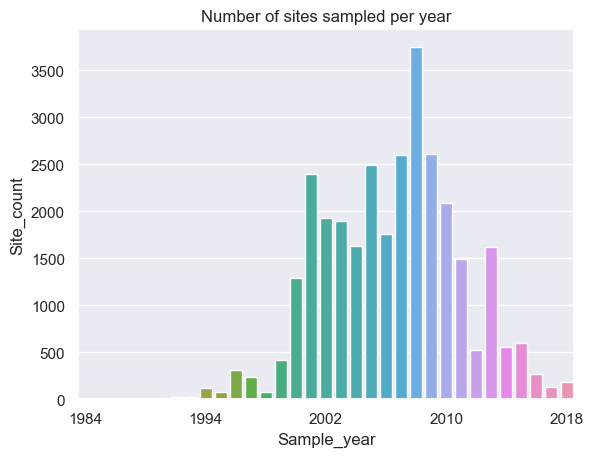

In [233]:
# Plot the results
sns.set_style("dark")
sns.set()
ax = sns.barplot(data=yearly_count.to_pandas(), x="Sample_year", y="Site_count")
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
plt.title("Number of sites sampled per year")
plt.show()

In [346]:
df_predicts.filter(pl.col("Source_ID") == "YY1_2015__Mandle").select(
    "Diversity_metric_unit"
).unique()

Diversity_metric_unit
str
"""percentage"""
"""individuals"""
"""presence/absen…"


In [347]:
df_predicts.filter(pl.col("Source_ID") == "YY1_2015__Mandle").select(
    "Sampling_method"
).unique()

Sampling_method
str
"""fixed plots/qu…"


In [376]:
mandle = (
    df_predicts.filter(pl.col("Source_ID") == "YY1_2015__Mandle")
    .group_by("SS")
    .agg(pl.col("Taxon_name_entered").unique())
)

In [377]:
mandle.select("Taxon_name_entered")[0]

Taxon_name_entered
list[str]
"[""Diospyros montana"", ""Bridelia retusa"", … ""Wendlandia thyrsoidea""]"
